Dataset: https://www.kaggle.com/datasets/gargmanas/parkinsonsdataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Load Parkinson's dataset 
df = pd.read_csv('parkinsons.csv')

In [3]:
# Display first few rows of the dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Data Preprocessing (dropping non-numeric and target columns)
X = df.drop(columns=['name', 'status'])
y = df['status']

In [5]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# K-means Clustering
# Perform KMeans clustering with 2 clusters (healthy vs Parkinson's)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [7]:
# Add the cluster labels to the dataframe for visualization
df['Cluster'] = kmeans.labels_

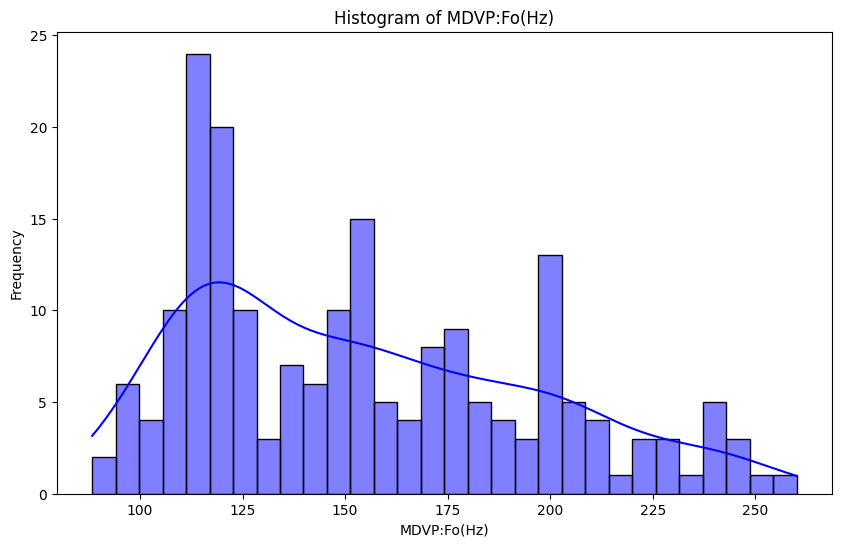

In [8]:
# Plotting 1: Histogram of 'MDVP:Fo(Hz)'
plt.figure(figsize=(10,6))
sns.histplot(df['MDVP:Fo(Hz)'], kde=True, color='blue', bins=30)
plt.title('Histogram of MDVP:Fo(Hz)')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency')
plt.show()

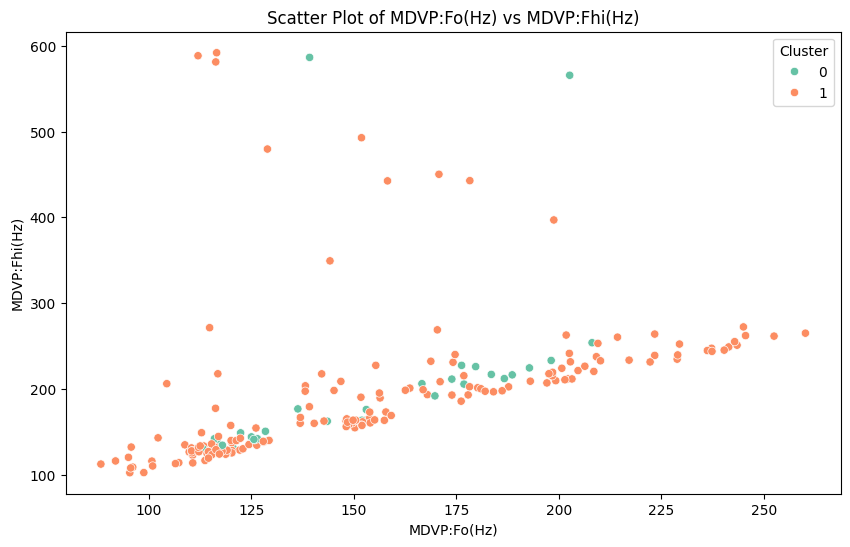

In [9]:
# Plotting 2: Scatter plot of two features, e.g., 'MDVP:Fo(Hz)' vs 'MDVP:Fhi(Hz)'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['MDVP:Fo(Hz)'], y=df['MDVP:Fhi(Hz)'], hue=df['Cluster'], palette='Set2')
plt.title('Scatter Plot of MDVP:Fo(Hz) vs MDVP:Fhi(Hz)')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.show()

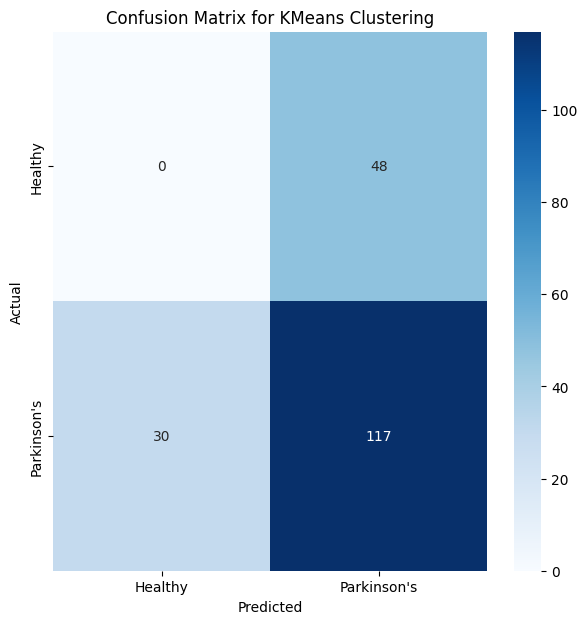

In [10]:
# Plotting 3: Confusion Matrix for KMeans Clustering vs Actual Labels
# Create a confusion matrix
conf_matrix = confusion_matrix(y, df['Cluster'])

# Plot Confusion Matrix
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinson\'s'], yticklabels=['Healthy', 'Parkinson\'s'])
plt.title('Confusion Matrix for KMeans Clustering')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


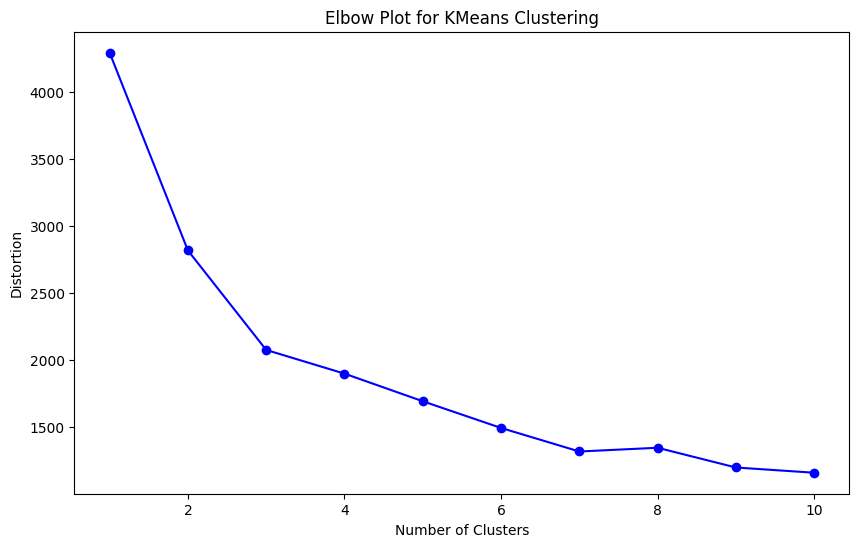

In [11]:
# Plotting 4: Elbow Plot for KMeans Clustering
# Calculate the distortion for a range of cluster numbers to plot the elbow curve
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K_range, distortions, marker='o', color='blue')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

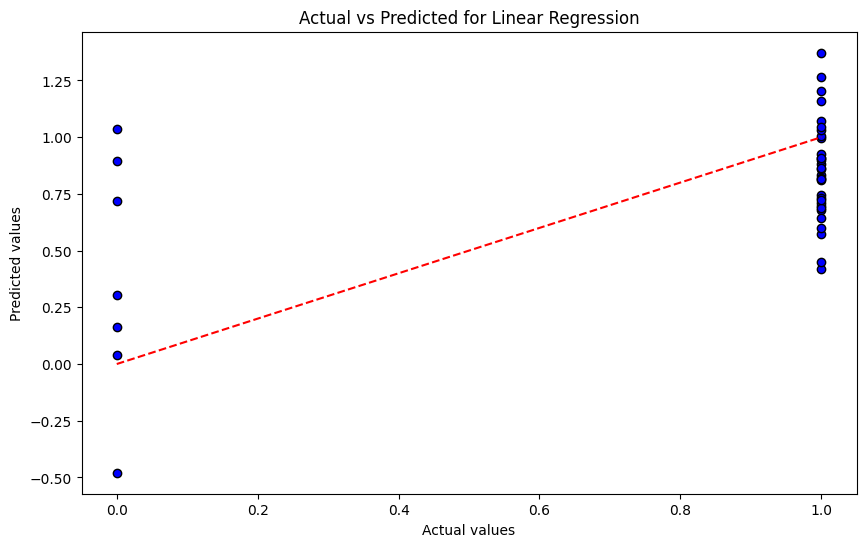

In [12]:
# Linear Regression and Line Fitting
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prediction
y_pred = lin_reg.predict(X_test)

# Plotting: Line Fitting - Scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Perfect prediction line
plt.title('Actual vs Predicted for Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()